# Ch02.06. 산점도

---
* 날짜: 2022.04.19
* 이름: 윤태우


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [1,2,3]
y = [2,4,6]
plt.scatter(x, y)
plt.show()
```

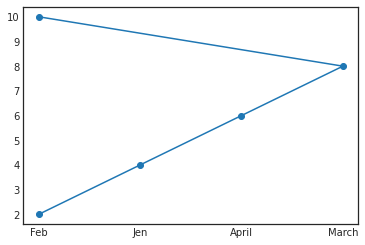

In [ ]:
x = ['Feb','Jen','April','March','Feb']
y = [2,4,6,8,10]
plt.scatter(x, y)
plt.plot(x, y)
plt.show()
# plt.plot(x, y, marker = 'o', linestyle = '') 와 같음.

#### | 옵션

```
plt.scatter(x, y, 
            s=None, # 마커 크기 - x, y 길이와 동일
            c=None, # 색깔 - x, y의 길이와 동일 
            marker=None # 마커 종류
            cmap=None, # 컬러맵
            norm=None, # 정규화 여부
            alpha=None, # 투명도
            linewidths=None, # 테두리 두께
            edgecolors=None) # 테두리 색깔 - 기본 'face'
```

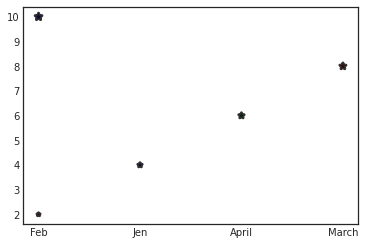

In [ ]:
plt.scatter(x,y, 
            s=[10,20,30,40,50], c = ['red','blue','green','red','blue'],
            marker = '*', 
            cmap = 'Blues', norm = True,
            alpha = 0.8, linewidth = 3,
            edgecolors = 'black')

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.scatterplot(x=x,y=y)
```

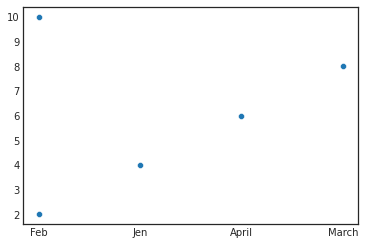

In [ ]:
sns.scatterplot(x=x,y=y)


#### | 옵션

```
seaborn.scatterplot(x=None, y=None, 
                    style=None, # 마커 스타일 리스트
                    palette=None, # 컬러맵
                    alpha=None, # 투명도 
                    legend='auto' # 각주위치 {auto, brief, full, False}) 
                    
```

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


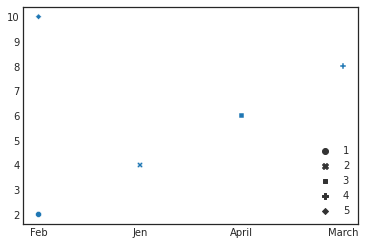

In [ ]:
sns.scatterplot(x,y, style=[1,2,3,4,5])

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.



In [ ]:
df = pd.DataFrame([x,y],['x','y']).T
df

,x,y
0,Feb,2
1,Jen,4
2,April,6
3,March,8
4,Feb,10


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot.scatter(x=x, y=y)
```




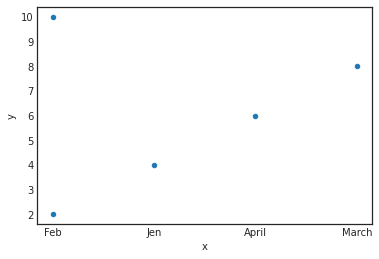

In [ ]:
df.plot.scatter('x', 'y')

#파이썬에서 활용해야 할 것 정도는 외워야 하지만, 앞으로 할 머신러닝 같은 것들은 다 외워서 할 필요는 없다, 더블모니터 등을 활용해서 검색하고 활용하면서 작업을 수행할것.

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.scatterplot(data=df, x=x, y=y)
```


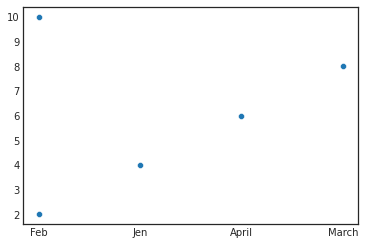

In [ ]:
sns.scatterplot(data=df, x=x, y=y)


##  **실습** 
---



### (1) 데이터에 따른 크기 및 색깔 지정

```
n = 50
np.random.seed(42)
x = np.random.rand(n)
y = np.random.rand(n)
```

In [ ]:
n = 50
np.random.seed(42)      # 시드 지정
x = np.random.rand(n)   # 균등분포
y = np.random.rand(n)
x.shape, y.shape

((50,), (50,))

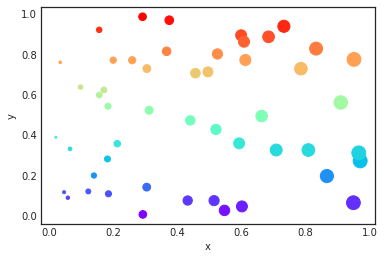

In [ ]:
plt.scatter(x,y, s = x*200,           # s = x -> x값에 따라 scatter의 크기가 커짐. 
            c = y, cmap = 'rainbow')  # c = x -> x값에 따라 색이 컬러맵인 레인보우에 따라 변함,
                                      # c = y -> y값에 따라 색이 변함.
# plt.colorbar() # 여기서 지정한 컬러바에 따라 바뀜

plt.xlabel('x')  # x축 이름           
plt.ylabel('y')  # y축 이름
plt.show()

### (2) 산점도를 이용한 아이리스 데이터 시각화



```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print('x_names=', x_names)
y_names = iris.target_names
print('y_names=',y_names)
x_data = iris.data
y_data = iris.target

data1 = pd.DataFrame(x_data)
data1.columns = x_names
data1['label'] = y_data

print(x_data.shape,y_data.shape)
data1.head()

x_names= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y_names= ['setosa' 'versicolor' 'virginica']
(150, 4) (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


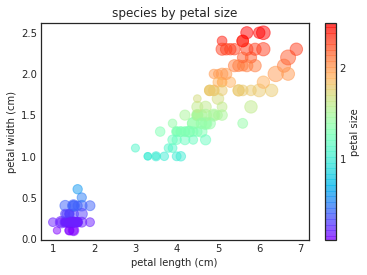

In [ ]:
plt.scatter(x_data[:,2], x_data[:,3],s=x_data[:,1]*x_data[:,0]**2, c = x_data[:,3], cmap = 'rainbow', alpha = 0.5)
# size가 sepal size에 비례하게.
plt.xlabel(x_names[2])
plt.ylabel(x_names[3])
plt.title('species by petal size')
plt.colorbar(ticks=[0,1,2], label = 'petal size')
plt.show()


##  **과제** 
---


### (1) 산점도를 이용한 캘리포니아 집값 시각화

* 아래와 같은 산점도를 그리세요.
  * `/content/sample_data/california_housing_test.csv`을 불러오세요.
  * `x`축은 `latitude` 입니다.
  * `y`축은 `longitude` 입니다.
  * 점의 크기는 `population`에 비례합니다.
  * `median_house_value`로 색깔을 나타내고 `colorbar`를 추가합니다.
* 색과 마커, 비례 정도 등 세세한 부분은 각자의 스타일로 그리세요.

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0205-01.png?raw=true)

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
x = df['latitude']
y = df['longitude']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Text(0.5, 1.0, 'California house value')

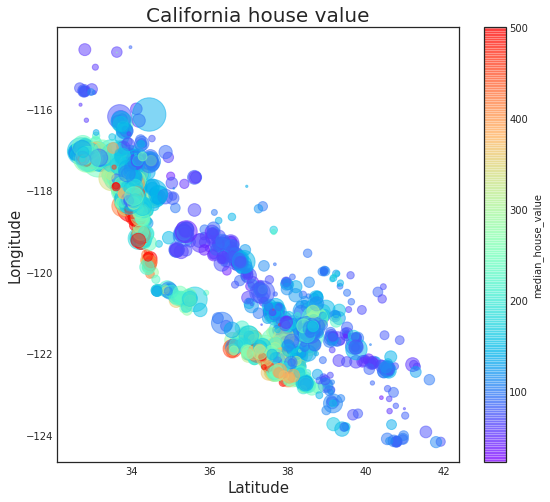

In [ ]:
plt.figure(figsize = (9,8))

plt.scatter(x,y, 
            s = df['population']/10, c = df['median_house_value']/1000,
            cmap = 'rainbow', alpha = 0.5)

plt.colorbar(label = 'median_house_value')

plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Longitude', fontsize = 15)
plt.title('California house value', fontsize = 20)